# Setting Up

## Move to base folder

In [17]:
%cd ./drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


# Utils

## compute_metrics()

In [9]:
## COMPUTE METRCIS
def compute_metrics(target, predicted):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    accuracy_s = accuracy_score(target, predicted)
    precision_macro = precision_score(target, predicted, average="macro")
    precision_pos = precision_score(target, predicted, average="binary", pos_label = 1)
    precision_neg = precision_score(target, predicted, average="binary", pos_label = 0)
    recall_pos = recall_score(target, predicted, average="binary", pos_label = 1)
    recall_neg = recall_score(target, predicted, average="binary", pos_label = 0)
    f1_pos = f1_score(target, predicted, average="binary", pos_label = 1)
    f1_neg = f1_score(target, predicted, average="binary", pos_label = 0)

    results = {'acc':accuracy_s, 
              'prec_pos' : precision_pos,
              'prec_neg' : precision_neg,  
              'recall_pos' : recall_pos,
              'recall neg' : recall_neg,
              'f1_pos': f1_pos,
              'f1_neg': f1_neg}
    
    return results

## load_encoded_corpus()

In [10]:
## LOAD ENCODED CORPUS
def load_encoded_corpus(encoding_id):
  """ 
  Loads encoded dataset from drive. Returns train and test sets ready to be 
  fed into training algorithm
  
  Input:
  encoding_id  -- str

  Output:
  (X_train, y_train, X_test, y_test) -- encoded dataset

  """
  import pickle
  import numpy as np
  
  encodings_list = ['',
                    'FastText 1 - Common Crawl + Wikipedia',
                    'FastText 2 - Esp. Wikipedia',
                    'FastText 3 - Spanish Unannotated Corpora',
                    'W2V 1 - Spanish Unannotated Corpora',
                    'W2V 2 - Spanish CoNLL',
                    'GloVe 300d - Spanish Billion Word Corpus',
                    'GloVe 100d - Spanish Billion Word Corpus'
                    ]

  encoding = encodings_list[encoding_id]

  print(encoding)
  print('Loading encoded tweets and labels...')

  ## Encoded Tweets
  if encoding_id == 1:
    # 'FastText 1 - Common Crawl + Wikipedia'
    train_file_path = 'dataset_files/EncodedTrainTweets_FastText1_pr2'
    test_file_path = 'dataset_files/EncodedTestTweets_FastText1_pr2'

  elif encoding_id == 2:
    #'FastText 2 - Esp. Wikipedia'
    train_file_path = 'dataset_files/EncodedTrainTweets_FastText2_pr2'
    test_file_path = 'dataset_files/EncodedTestTweets_FastText2_pr2'
    
  elif encoding_id == 3:
    # 'FastText 3 - Spanish Unannotated Corpora'
    train_file_path = 'dataset_files/EncodedTrainTweets_FastText3_pr2'
    test_file_path = 'dataset_files/EncodedTestTweets_FastText3_pr2'
    
  elif encoding_id == 4:
    # 'W2V 1 - Spanish Unannotated Corpora'
    train_file_path = 'dataset_files/EncodedTrainTweets_W2V1_pr2'
    test_file_path = 'dataset_files/EncodedTestTweets_W2V1_pr2'
    
  elif encoding_id == 5:
    # 'W2V 2 - Spanish CoNLL'
    train_file_path = 'dataset_files/EncodedTrainTweets_W2V2_pr2'
    test_file_path = 'dataset_files/EncodedTestTweets_W2V2_pr2'
    
  elif encoding_id == 6:
    # 'GloVe 300d - Spanish Billion Word Corpus'
    train_file_path = 'dataset_files/EncodedTrainTweets_GloVe300d_pr2'
    test_file_path = 'dataset_files/EncodedTestTweets_GloVe300d_pr2'
    
  elif encoding_id == 7:
    # 'GloVe 50d - Spanish Billion Word Corpus'
    train_file_path = 'dataset_files/EncodedTrainTweets_GloVe100d_pr2'
    test_file_path = 'dataset_files/EncodedTestTweets_GloVe100d_pr2'

  with open(train_file_path, 'rb') as filehandle:
      # store the encoded documents as binary data
      X_train = pickle.load(filehandle)

  with open(test_file_path, 'rb') as filehandle:
      # store the encoded documents as binary data
      X_test = pickle.load(filehandle)


  ## Labels
  with open('dataset_files/TrainLabels', 'rb') as filehandle:
      # store the encoded documents as binary data
      y_train = pickle.load(filehandle)

  with open('dataset_files/TestLabels', 'rb') as filehandle:
      # store the encoded documents as binary data
      y_test = pickle.load(filehandle)

  '''
  y_train = [int(t[0]) for t in y_train]
  y_test = [int(t[0]) for t in y_test]

  y_train_array = np.array(y_train).reshape(-1,1)
  y_test_array = np.array(y_test).reshape(-1,1)
  
  '''

  print('\nComplete')
  print('{} training instances\n {} test instances'.format(len(X_train), len(X_test)))
  print('\nencodings_dim = {}'.format(X_train[0].shape[1]))

  return(np.concatenate(X_train, axis=0), y_train, np.concatenate(X_test, axis=0), y_test)
    

## save_my_model()

In [11]:
## SAVE TRAINED MODEL
def save_my_model(model, model_label):
    """ 
    Saves trained model and model.history.history into disk storage.

    """
    import pickle

    model_folder_path = 'PretrainedModelsTest/' + model_label
    history_path = model_folder_path + '/history_dict'
    
    model.save(model_folder_path)  # This creates a folter at folder_path

    # Saves model history into the model_folder created above
    with open(history_path, 'wb') as handler:
        pickle.dump(model.history.history, handler)



## load_pretrained_model()

In [12]:
## LOAD PRETRAINED MODEL
def load_pretrained_model(path):
  # model.history.history
  #import tensorflow as tf
  import pickle
  from tensorflow import keras
  reloaded_model = keras.models.load_model(path)

  history_path = path + '/history_dict'

  with open(history_path, 'rb') as handler:
      # store the encoded documents as binary data
      history = pickle.load(handler)

  history_df = pd.DataFrame(history)

  return (reloaded_model, history_df)

## define_model()

In [13]:
def define_model(layers_size, p_dropout = 0.65, optimizer_ = 'rmsprop'):

    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Activation,Dropout
    # from tensorflow.keras.callbacks import EarlyStopping
    model = Sequential()

    # https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
    model.add(Dense(units=layers_size[0], activation='relu'))
    model.add(Dense(units=layers_size[1], activation='relu'))
    model.add(Dropout(p_dropout))
    model.add(Dense(units=layers_size[2], activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer = optimizer_, metrics = ['accuracy'])

    return model


## try_fitting()

In [14]:
import tensorflow as tf
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        acc = logs['accuracy'] 
        val_acc = logs["val_accuracy"]
        if (val_acc >= self.threshold) | (acc - val_acc > 0.30):
            self.model.stop_training = True

def try_fitting(model, data, b_size = 750, target_acc = 0.79, plot_acc = False):

  """
  """
  stopping_condition = MyThresholdCallback(threshold = target_acc)

  X_train, y_train, X_test, y_test = data
  model.fit(x=X_train, 
          y=y_train, 
          epochs= 300,
          validation_data=(X_test, y_test), 
          verbose = 0, 
          batch_size = b_size,
          callbacks=[stopping_condition] 
          )
  
  accuracy = model.history.history['val_accuracy'][-1]
  # print('accuracy = {}'.format(accuracy))

  if plot_acc:
    import pandas as pd
    model_loss = pd.DataFrame(model.history.history)
    model_loss[['accuracy', 'val_accuracy']].plot()

  return (model, accuracy)

# Loading encoded Tweets and labels

In [15]:
encoding_id = 2
encodings_strings = ['',
                    'FT1',
                    'FT2',
                    'FT3',
                    'W2V1',
                    'W2V2',
                    'GloVe1_300d',
                    'GloVe1_100d']

encoding_string = encodings_strings[encoding_id]

In [18]:
X_train, y_train, X_test, y_test = load_encoded_corpus(encoding_id)
encodings_dim = X_train.shape[1]

FastText 2 - Esp. Wikipedia
Loading encoded tweets and labels...

Complete
4500 training instances
 500 test instances

encodings_dim = 300


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Model Search

In [ ]:
from itertools import product

if encodings_dim == 300:  
  # 300 dimensions encodings    
  layers_size_options = [[400, 120, 1], [280, 80, 1]]
elif encodings_dim == 100:  
  # 100 dimensions encodings  
  layers_size_options = [[175, 50, 1]]

optimizer_options = ['adam', 'rmsprop']
batch_size_options = [300, 500, 750]
p_dropout_options = [0.5, 0.6, 0.675, 0.75, 0.8]
target_acc_values = [0.8200, 0.8250, 0.8275, 0.8300, 0.8400, 
                     0.8500, 0.8600, 0.8700, 0.8800, 0.9000]

search_history = []    # tracks history in model search 
configurations_space = product(layers_size_options,
                               optimizer_options,
                               batch_size_options,
                               p_dropout_options) 

for configuration in configurations_space:
  layers_size, optimizer, b_size, p_dropout = configuration
  ls1, ls2, ls3 = layers_size

  # Print configuration info
  print('\nParameters config:')
  print('opt: {}'.format(optimizer))
  print('batch_size: {}'.format(b_size))
  print('layers_size: {}, {}, {}'.format(ls1, ls2, ls3))
  print('p_drop: {}'.format(p_dropout))

  configuration_tries_count = 0    # counts the fitting tries for the current configuration 
  max_accuracy = 0                 # tracks max accuracy in current config serach
  tries2max = 0                    # tracks the number of fitting tries until max_accuracy

  target_values_count = len(target_acc_values)
  i = 0
  while i < target_values_count:
    current_target = target_acc_values[i]
    print('\nTrying target_value = {}'.format(current_target))

    acc = 0
    tries_count = 0   # tracks the number of fitting tries for current_target
    while acc < current_target and tries_count < 40:
      if 'model' in globals(): # really helpful??
        del globals()['model']
      model = define_model(layers_size, p_dropout, optimizer)
      data = (X_train, y_train, X_test, y_test)
      model, acc = try_fitting(model, data, target_acc = current_target, b_size = b_size, plot_acc = False)
      tries_count += 1
      configuration_tries_count += 1

      if tries_count % 2 == 0:
        print("*", end = '')
        if tries_count % 10 == 0:
          print(' ', end = '')

    if acc < current_target:
      break
    else:
      # save model 
      # model_label example: FT1_adam_bs300_ls_400_120_1_pd675_acc8150
      print('')
      model_label = '{}_{}_bs{}_ls_{}_{}_{}_pd{}_acc{}'.format(encoding_string, optimizer, b_size, ls1, ls2, ls3, p_dropout * 1000, int(acc*10000)) 
      save_my_model(model, model_label)

      max_accuracy = acc
      tries2max = configuration_tries_count

      for new_i in range(i, target_values_count):
        if acc < target_acc_values[new_i]:
          i = new_i
          # print('new i_value = {}'.format(i))
          break

  print('\nConfiguration search complete.')
  print('best accuracy_value: {}'.format(max_accuracy))

  # append the results for the current configuration to search_history
  search_history.append({'opt': optimizer, 
                         'bs': b_size, 
                         'l_size': layers_size, 
                         'p_drop': p_dropout, 
                         'max_acc': max_accuracy,
                         'tries2max': tries2max})
  
print('\nSEARCH COMPLETE')

import pickle 
# Saves model history into the model_folder created above
with open('/SearchRecords/history_' + encoding_string, 'wb') as handler:
    pickle.dump(search_history, handler)


Parameters config:
opt: adam
batch_size: 300
layers_size: 400, 120, 1
p_drop: 0.5

Trying target_value = 0.82
***

KeyboardInterrupt: ignored

In [ ]:
if 'model' in locals():
  print('hola')
  del globals()['model']

0.8240000009536743 (84, 4)


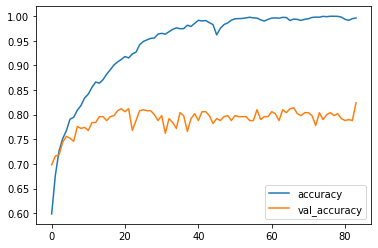

In [ ]:
import pandas as pd
model = define_model([400, 120, 1], p_dropout=0.75, optimizer_= 'adam')
data = (X_train, y_train, X_test, y_test)
model, acc = try_fitting(model, data, target_acc = 0.8220, b_size = 300, plot_acc = True)
history_df = pd.DataFrame(model.history.history)
print(acc, history_df.shape)

In [ ]:
import pandas as pd
sh_df = pd.DataFrame(search_history)
sh_df.head()

""


In [ ]:
len(search_history)

0

# Saving a trained model

In [ ]:
model_s = 'FT2_adam_bs300_ls400_120_1'
save_my_model(model, model_s)

INFO:tensorflow:Assets written to: PretrainedModelsTest/FT2_adam_bs300_ls400_120_1_acc8240/assets


In [ ]:
model.metrics

# Loading a pretrained model

In [ ]:
reloaded_model, history_df = load_pretrained_model('PretrainedModelsTest/FT2_adam_bs300_ls400_120_1_acc8220')

In [ ]:
history_df.tail()

,loss,accuracy,val_loss,val_accuracy
27,0.120015,0.957778,0.633837,0.814
28,0.115768,0.960222,0.676587,0.790
29,0.116020,0.956444,0.645638,0.792
30,0.121703,0.957111,0.659746,0.800
31,0.107087,0.964444,0.673803,0.822


In [ ]:
reloaded_model.summary()

Model: "sequential_533"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1599 (Dense)           (None, 400)               120400    
_________________________________________________________________
dense_1600 (Dense)           (None, 120)               48120     
_________________________________________________________________
dropout_533 (Dropout)        (None, 120)               0         
_________________________________________________________________
dense_1601 (Dense)           (None, 1)                 121       
Total params: 168,641
Trainable params: 168,641
Non-trainable params: 0
_________________________________________________________________


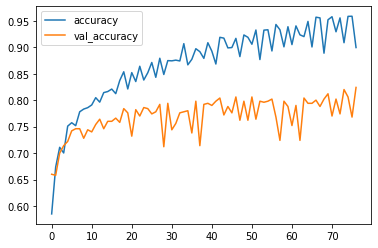

In [ ]:
import pandas as pd
history_df = pd.DataFrame(history)
history_df[['accuracy', 'val_accuracy']].plot()

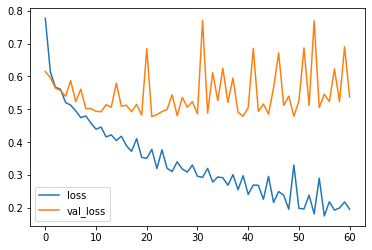

In [ ]:
history_df[['loss', 'val_loss']].plot()

# Import dataset from json files

In [ ]:
%cd /content/gdrive/My Drive/Colab Notebooks/

/content/gdrive/My Drive/Colab Notebooks


In [ ]:
import json
train_set = []
dev_set = []
    
path_train = 'dataset_files/train_es_A.json'
path_dev = 'dataset_files/dev_es_A.json'

for line in open(path_train, 'r'):
    train_set.append(json.loads(line))
    
for line in open(path_dev, 'r'):
    dev_set.append(json.loads(line))

In [ ]:
len(train_set), len(dev_set)

(4500, 500)

## Get X and Y from dataset

For this excercise we'll only consider the *hate label* in every entry.

In [ ]:
raw_X_train = []
for entry in train_set:
    raw_X_train.append(entry['text'])

raw_X_test = []
for entry in dev_set:
    raw_X_test.append(entry['text'])

In [ ]:
badly_labaled = []
for i, (a, b) in enumerate(zip(y_test, predictions)):
  if a == 0 & a != b:
    badly_labaled.append(i)

In [ ]:
badly_labaled[0]

12

In [ ]:
raw_X_test[badly_labaled[11]]

'@JanaBeris1  @edubronstein  @Isaac_555 Estoy emocionado como puede haber tanta hermandad entre arabes y judios... A parte la barbarie, solo el odio puede unirles... https://t.co/21N1d8FEMP'

In [ ]:
import pandas as pd
model_loss = pd.DataFrame(model.history.history)

In [ ]:
# model_loss

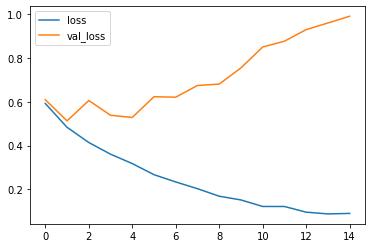

In [ ]:
import pandas as pd
model_loss = pd.DataFrame(model.history.history)

model_loss.plot()

## Performance evaluation

# Model Evaluation

In [ ]:
predictions = reloaded_model.predict_classes(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
predictions = model.predict_classes(X_test)
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       278
           1       0.79      0.75      0.77       222

    accuracy                           0.80       500
   macro avg       0.80      0.79      0.80       500
weighted avg       0.80      0.80      0.80       500



In [ ]:
predictions = model.predict_classes(X_test)
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       278
           1       0.79      0.77      0.78       222

    accuracy                           0.80       500
   macro avg       0.80      0.80      0.80       500
weighted avg       0.80      0.80      0.80       500



# Resources

* Mini batch size selection: [1](https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch), [2](https://www.quora.com/In-deep-learning-why-dont-we-use-the-whole-training-set-to-compute-the-gradient), [3](https://stats.stackexchange.com/questions/164876/what-is-the-trade-off-between-batch-size-and-number-of-iterations-to-train-a-neu)
* Optimizers: [1](https://ai.stackexchange.com/questions/18206/what-kind-of-optimizer-is-suggested-to-use-for-binary-classification-of-similar)
* RMSprop: [1](https://towardsdatascience.com/understanding-rmsprop-faster-neural-network-learning-62e116fcf29a)
